In [306]:
import os
import random
from PIL import Image
from image_transformer import ImageTransformer, save_image
import torchvision.transforms as transforms
from IPython.display import display

In [307]:
def convert_jpg_to_png():
    os.mkdir("./data/converted/")
    
    for dir in os.listdir('./data/images/'):
        name = dir.replace('.jpeg','.png')
        img_path = f'./data/images/{dir}'
        new_path = f'./data/converted/{name}'
    
        image = Image.open(img_path)

        # Specifying the RGB mode to the image
        image = image.convert('RGBA')

        # Converting an image from PNG to JPG format
        image.save(new_path)
        
if not os.path.exists("./data/converted/"):
    convert_jpg_to_png()

In [308]:
# Input image path
angle = random.randrange(15, 60)
border_size = 80

img_path = './data/converted/107449.png'
new_path = './data/processed/107449.png'
img_shape = None

# Instantiate the class
it = ImageTransformer(img_path, img_shape, border_size)

# Make output dir
if not os.path.isdir('./data/processed'):
    os.mkdir('./data/processed')

In [309]:
print(angle)

35


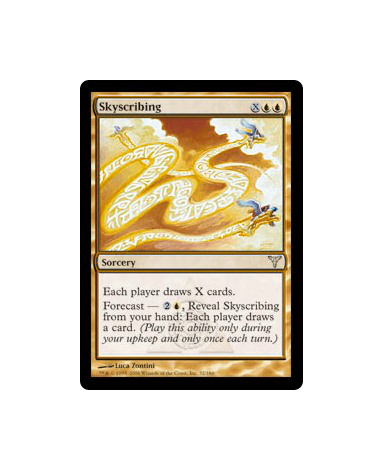

In [310]:
og_image = rotated_img = transforms.ToPILImage()(it.image)
display(og_image)

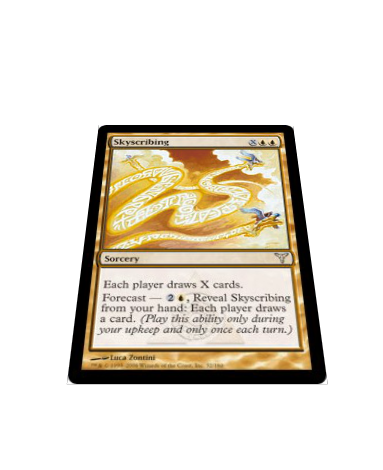

In [311]:
""" Example of rotating an image along x-axis from 15 to 60 degrees
    with a 5 pixel shift in +X direction """
rotated_img = it.rotate_along_axis(theta = -angle, dx = 5)
rotated_img = transforms.ToPILImage()(rotated_img)
display(rotated_img)

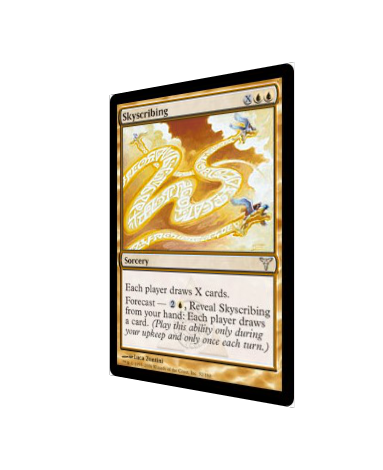

In [312]:
""" Example of rotating an image along y-axis from 15 to 60 degrees """
rotated_img = ImageTransformer(img_path, img_shape, border_size).rotate_along_axis(phi = -angle)
rotated_img = transforms.ToPILImage()(rotated_img)
display(rotated_img)

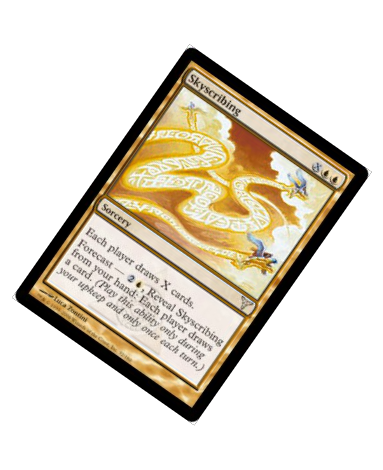

In [313]:
""" Example of rotating an image along z-axis(Normal 2D) from 15 to 60 degrees"""
rotated_img = ImageTransformer(img_path, img_shape, border_size).rotate_along_axis(gamma = angle)
rotated_img = transforms.ToPILImage()(rotated_img)
display(rotated_img)

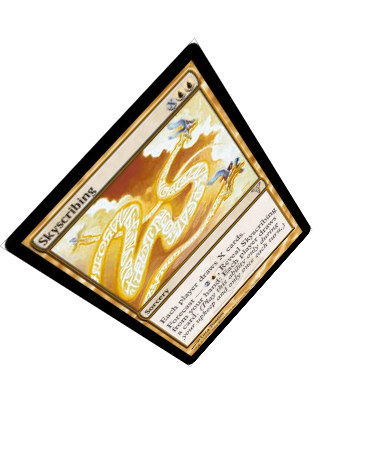

In [314]:
rotated_img = ImageTransformer(img_path, img_shape, border_size).rotate_along_axis(theta=-angle, phi=-angle, gamma=-angle)
rotated_img = transforms.ToPILImage()(rotated_img)
display(rotated_img)

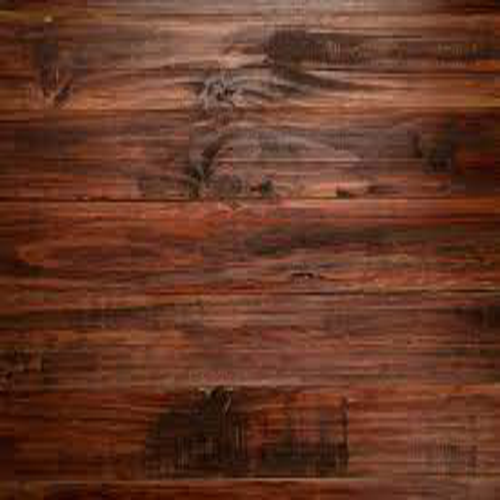

In [315]:
import glob, random
images = glob.glob("./data/table_images/*.jpg")
random_image = random.choice(images)
background = Image.open(random_image).resize((500, 500))
display(background)

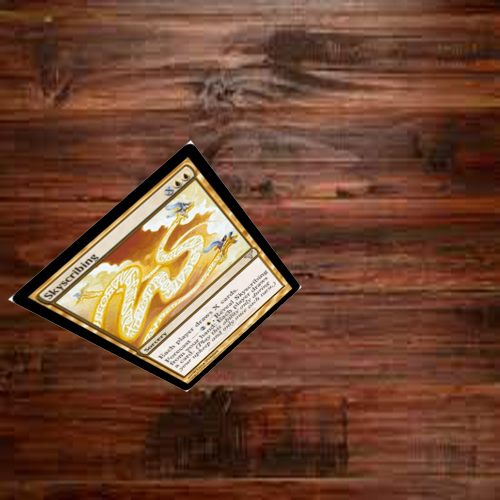

In [316]:
background = background.convert('RGBA')
foreground = rotated_img.resize((360, 360))
x = random.randint(0, background.size[0] - foreground.size[0])
y = random.randint(0, background.size[1] - foreground.size[1])
background.paste(foreground, (x, y), foreground)
display(background)

In [317]:
background.save(new_path)